In [161]:
import torch
from torch import nn
from torch import functional as F
import matplotlib.pyplot as plt

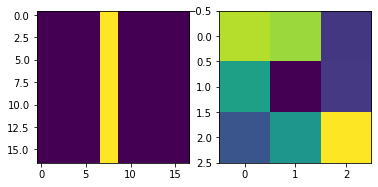

In [198]:
x = torch.zeros((17,17))
x[:,7:9] = 1
K = torch.rand((3,3))
plt.subplot(1,2,1)
plt.imshow(x)
plt.subplot(1,2,2)
plt.imshow(K)

In [243]:
def corr2d(X, K, d = 0):  
    """Compute 2D dilated cross-correlation."""
    if d != 0:
      K_dilated = torch.zeros(2**(d + 2 ) -1, 2**(d  + 2) - 1)
      K_dilated[2 ** (d ) -1::2 ** (d )   ,2**(d ) -1::2 ** (d ) ] = K

    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    if d:
      return Y, K_dilated
    else:
      return Y, K

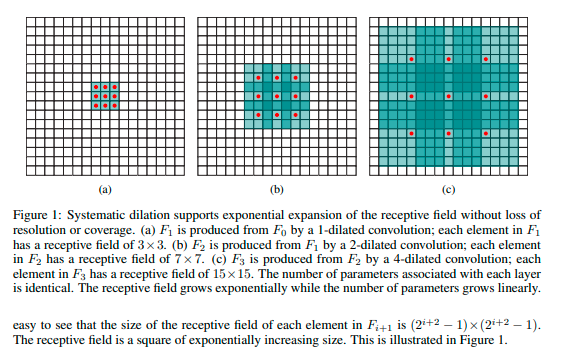

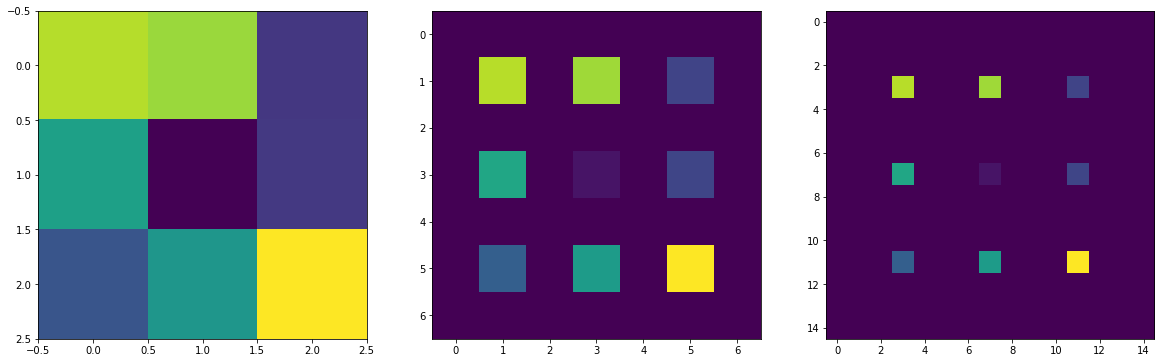

In [246]:
plt.figure(figsize = (20,12))

_, k0 = corr2d(x, K ,0)
plt.subplot(1,3,1)
plt.imshow(k0)

_, k1 = corr2d(x, K ,1)
plt.subplot(1,3,2)
plt.imshow(k1)

_, k2 = corr2d(x, K ,2)
plt.subplot(1,3,3)
plt.imshow(k2)